In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

ZADANIE 1 - RÓWNANIE DUFFINGA

Text(0.5, 1.0, 'Wykres fazowy dla f=0.200000')

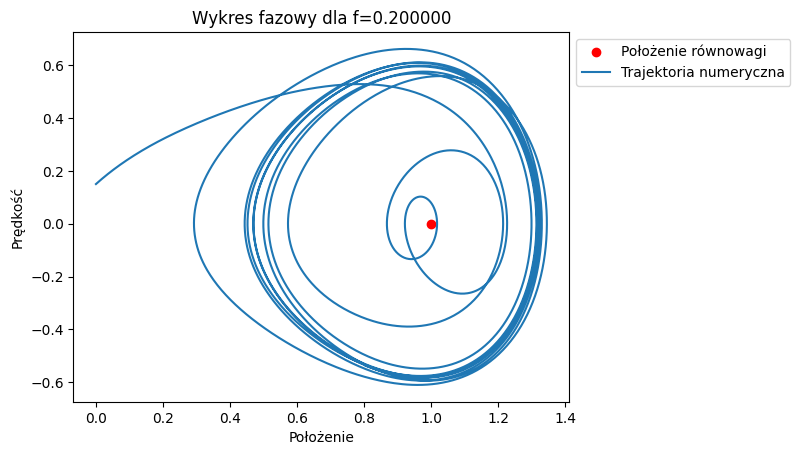

In [11]:
# Funkcja 

a = 1
b = 1
c = 0.2
omg = 0.213*2*math.pi
f = 0.2

def func(t, y):
    return [y[1], b*y[0] - a*y[0]**3 - c*y[1] + f*math.cos(omg*t)]

# Obliczenia numeryczne

start, end = 0, 50
t = np.linspace(start, end, 4000)
sol1 = solve_ivp(func, [start, end], [0, 0.15], t_eval = t)

# Wykres

opis = []
plt.scatter([1],[0], color = 'red')
opis.append('Położenie równowagi')
plt.plot(sol1.y[0, :], sol1.y[1, :])
opis.append('Trajektoria numeryczna')
plt.legend(opis, bbox_to_anchor = (1,1))
plt.xlabel('Położenie')
plt.ylabel('Prędkość')
plt.title('Wykres fazowy dla f=%f' % f)

Text(0.5, 1.0, 'Wykres położenia w funkcji czasu')

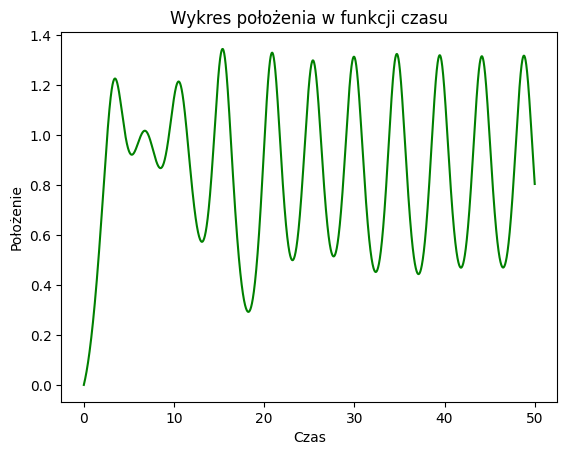

In [4]:
plt.plot(t, sol1.y[0], color ='green')
plt.xlabel('Czas')
plt.ylabel('Położenie')
plt.title('Wykres położenia w funkcji czasu')

Text(0.5, 1.0, 'Wykres prędkości w funkcji czasu')

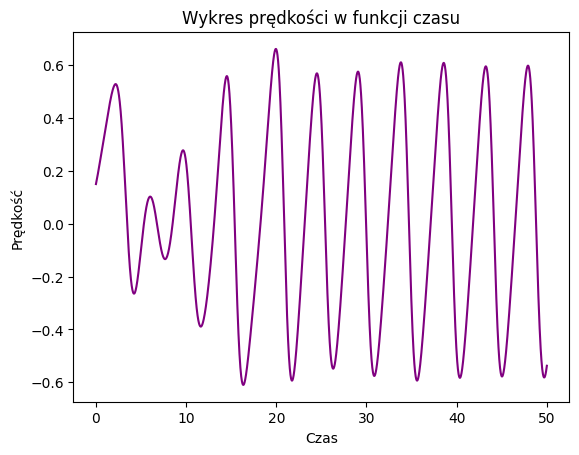

In [12]:
plt.plot(t, sol1.y[1, :], color ='purple')
plt.xlabel('Czas')
plt.ylabel('Prędkość')
plt.title('Wykres prędkości w funkcji czasu')

ZADANIE 2

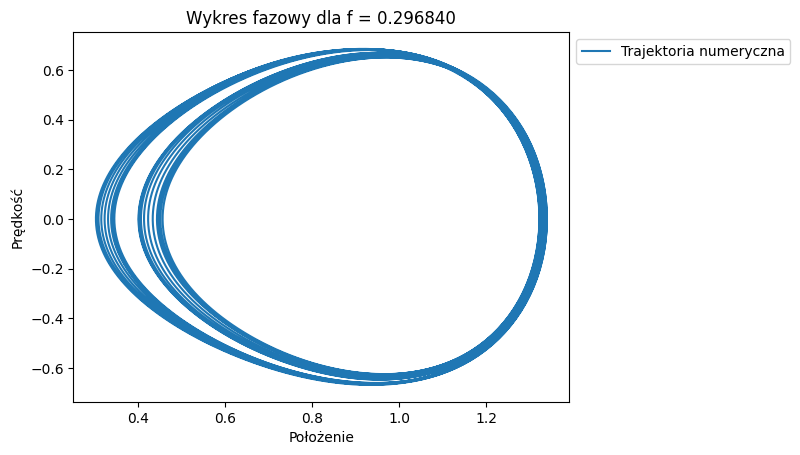

Text(0.5, 1.0, 'Wykres położenia dla f = 0.296840')

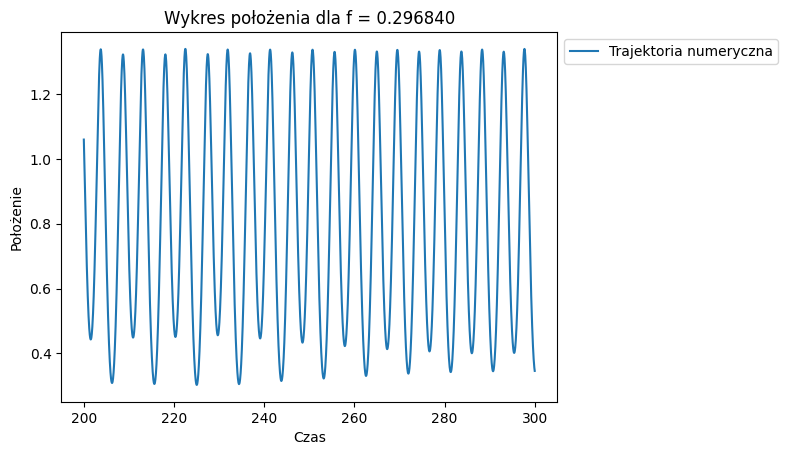

In [10]:
# Funkcja 

a = 1
b = 1
c = 0.2
omg = 0.213*2*math.pi
f = 0.29684

def func(t, y):
    return [y[1], b*y[0] - a*y[0]**3 - c*y[1] + f*math.cos(omg*t)]

# Obliczenia numeryczne

start, end = 0, 300
points = 10000
simStart = math.floor(200 / end * points)

t = np.linspace(start, end, points)
sol1 = solve_ivp(func, [start, end], [0, 0.15], t_eval = t)

# Wykresy

opis = []
plt.plot(sol1.y[0, simStart :], sol1.y[1, simStart :])
opis.append('Trajektoria numeryczna')
plt.legend(opis, bbox_to_anchor = (1,1))
plt.xlabel('Położenie')
plt.ylabel('Prędkość')
plt.title('Wykres fazowy dla f = %f' % f)
plt.show()

plt.plot(t[simStart :], sol1.y[0, simStart :])
plt.xlabel('Czas')
plt.ylabel('Położenie')
plt.legend(opis, bbox_to_anchor = (1,1))
plt.title('Wykres położenia dla f = %f' % f)

ZADANIE 3 - PRZEKRÓJ POINCARE

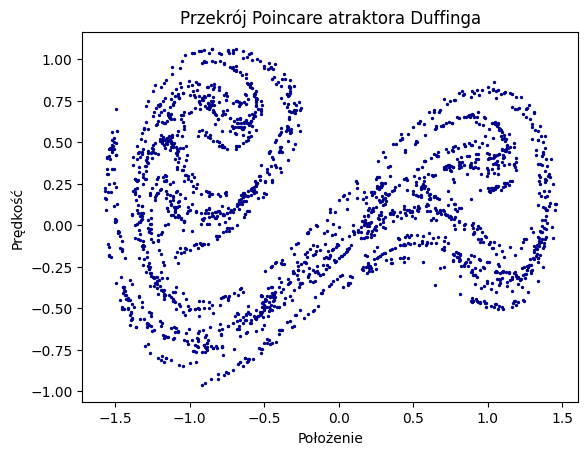

In [8]:
# Parametry 

a, b, c, f = 1, 1, 0.07, 0.3
omg = 0.213*2*math.pi
T = 1. / 0.213
moment = 0.0001

# Funkcja

def func(t, y):
    return [y[1], b*y[0] - a*y[0]**3 - c*y[1] + f*math.cos(omg*t)]

# Obliczenia numeryczne

start, end = 0, 10000
points = math.floor((end - start) // moment)
simStart = 200 // end * points
t = np.linspace(start, end, points)
sol1 = solve_ivp(func, [start, end], [0, 0.15], t_eval = t)

# Wykrajanie przekroju

selectNum = points // math.floor(T // moment)
selected = np.empty((2, selectNum))

for i in range(math.floor(simStart * moment // T), selectNum):
    selected[:, i]  = (sol1.y[0, math.floor(i * T // moment)], sol1.y[1, math.floor(i * T // moment)])

# Wykresy

plt.scatter(selected[0, :], selected[1, :], s = 2, color = 'darkblue')
plt.xlabel('Położenie')
plt.ylabel('Prędkość')
plt.title('Przekrój Poincare atraktora Duffinga')
plt.show()